Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


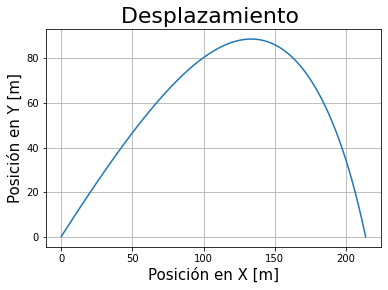

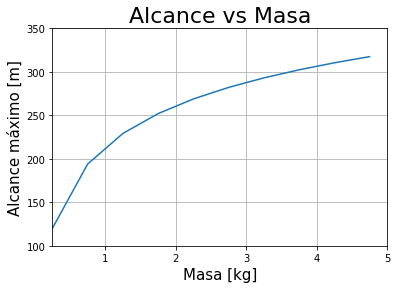

In [64]:
#Tomás Isaza Roldán
#CC 1036951049
#Proyecto métodos computacionales semestre 2022-2

import numpy as np
import matplotlib as plt
%pylab inline

"""
En el siguiente código se pretende explorar el movimiento de un cuerpo en un medio que presenta 
un coeficiente de arrastre diferente de cero y el efecto que tiene la variación de la masa en el alcance
de un proyectil que se mueve con una fuerza en contra proporcional a la velocidad, lo anterior usando el método 
iterativo para la solución de ecuaciones diferenciales Runge-Kutta de cuarto orden (RK4). 
Guiados además por las ecuaciones vistas en el notebook "diferential equations" visto en el curso.

"""

#Definimos los parámetros a utilizar

m=1                       #Masa unitaria [kg]
C=0.346                   #Coeficiente de arrastre 
g=9.81                    #Valor de la gravedad [m/s**2]
R=0.1                     #Radio del objeto [m]
p=1.22                    #Densidad del aire a 25 grados centígrados
ang=45*np.pi/180          #Ángulo de lanzamiento en grados
v0=100                    #Velocidad de lanzamiento [m/s]
K=(C*p*np.pi*R**2)/(2*m)  #Constante para usar en la ecuación
h=1e-3                    #Factor que vamos a utilizar en el método Runge-Kutta

posicion_x=list()                                                   #Creamos listas vacias para graficar
posicion_y=list()
s = np.array([0, 0, v0*np.cos(ang), v0*np.sin(ang)])                #Introducimos las condiciones iniciales como un array de numpy

def f(s):

    x=s[0]                                                          #Definimos la función que utilizaremos y especificamos explicitamente 
    y=s[1]                                                          #las posiciones iniciales y las velocidades en cada eje del array
    vx=s[2]
    vy=s[3]

    finalvx=-K*vx*np.sqrt(vx**2 + vy**2)                            #Ecuaciones de movimiento
    finalvy=-K*vy*np.sqrt(vx**2 + vy**2) - g/m

    return np.array([vx, vy, finalvx, finalvy])  

while s[1]>=0:                                                      #Aplicamos el método de Runge-Kutta (RK4) siempre que la posición en y sea positiva
    k1=h*f(s)                                                  
    k2=h*f(s + 0.5*k1)
    k3=h*f(s + 0.5*k2)
    k4=h*f(s + k3)

    s+=(k1 + 2*k2 + 2*k3 + k4)/6

    posicion_x.append(s[0])                                         #Llenamos las listas para graficar
    posicion_y.append(s[1])

plt.figure()
plt.plot(posicion_x, posicion_y)
plt.title( "Desplazamiento ",fontsize = 22 )
plt.xlabel("Posición en X [m]", size=15)
plt.ylabel("Posición en Y [m]", size=15)
plt.grid()

#Ahora vemos como cambia el alcance al variar la masa usando el mismo método

m_variable=np.arange(0.25, 5, 0.5)                                #Generamos un array con diferentes valores para la masa               

alcance_x=list()                                                  #Definimos una lista vacía para llenarla con el alcance para cada valor de la masa

for m in m_variable:                                                #Iteramos la misma función y el método anterior
    s=np.array([0, 0, v0*np.cos(ang), v0*np.sin(ang)])

    while s[1]>=0:
        k1=h*f(s)
        k2=h*f(s + 0.5*k1)
        k3=h*f(s + 0.5*k2)
        k4=h*f(s + k3)

        s+=(k1 + 2*k2 + 2*k3 + k4)/6

    alcance_x.append(s[0])                                          #Llenamos la lista con el valor de la posición en x al final de cada iteración

plt.figure()                                                        #Graficamos
plt.plot(m_variable, alcance_x)
plt.title( "Alcance vs Masa",fontsize = 22 )
plt.xlabel("Masa [kg]", size=15)
plt.ylabel("Alcance máximo [m]", size=15)
plt.xlim(0.25, 5)
plt.ylim(100, 350)
plt.grid()

#Vemos que a medida que la masa aumenta se obtiene un alcance mayor para el mismo valor de los parámetros utilizados,
#presentando la forma de una exponencial decreciente. El resultado obtenido tiene sentido físico.

#Referencias  
#https://es.wikipedia.org/wiki/M%C3%A9todo_de_Runge-Kutta
#https://github.com/restrepo/ComputationalMethods/blob/master/material/differential-equations.ipynb 